<a href="https://colab.research.google.com/github/Xminhakali/study/blob/main/buoi3_ct6_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install scipy
%pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=18053e7c674c5711c46f0fe43a88c0d85dc94ef008b3c3172e4304e595078ab0
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


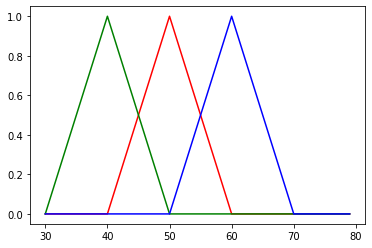

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,80,1)
slow = fuzz.trimf(x, [30,40,50])
medium = fuzz.trimf(x, [40,50,60])
fast = fuzz.trimf(x, [50,60,70])
plt.figure()
plt.plot(x,medium,'r',linewidth = 1.5, label = 'medium')
plt.plot(x,slow,'g',linewidth = 1.5, label = 'slow')
plt.plot(x,fast,'b',linewidth = 1.5, label = 'fast')

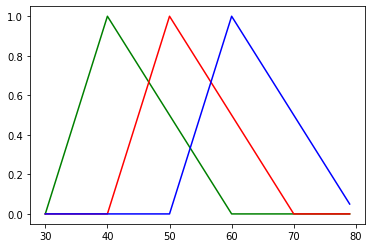

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80,1)

slow = fuzz.trapmf(x, [30,40,40,60])
medium = fuzz.trapmf(x, [40,50,50,70])
fast = fuzz.trapmf(x, [50,60,60,80])

plt.figure()
plt.plot(x,slow,'g',linewidth = 1.5, label = 'slow')
plt.plot(x,medium,'r',linewidth = 1.5, label = 'medium')
plt.plot(x,fast,'b',linewidth = 1.5, label = 'fast')



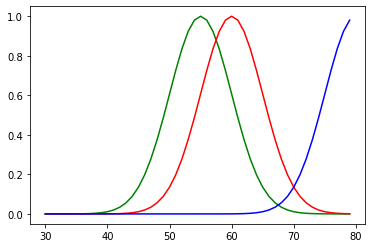

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80,1)

slow = fuzz.gaussmf(x, 55,5)
medium = fuzz.gaussmf(x,60,5)
fast = fuzz.gaussmf(x, 80,5)

plt.figure()
plt.plot(x,slow,'g',linewidth = 1.5, label = 'slow')
plt.plot(x,medium,'r',linewidth = 1.5, label = 'medium')
plt.plot(x,fast,'b',linewidth = 1.5, label = 'fast')





###################################################################################




26.88888888888889


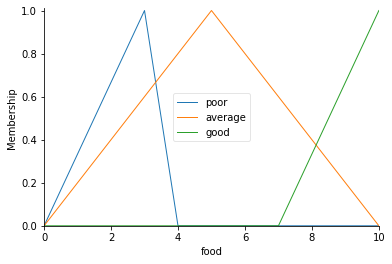

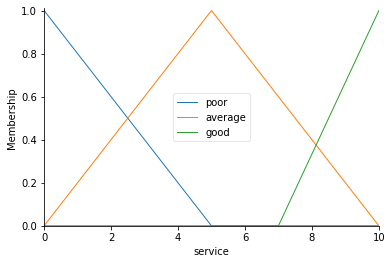

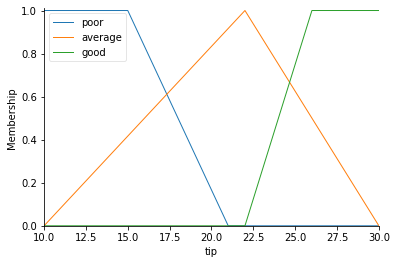

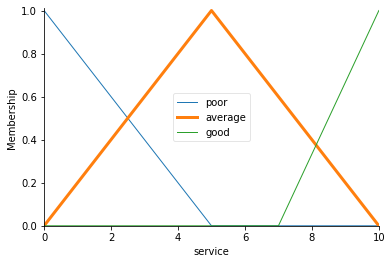

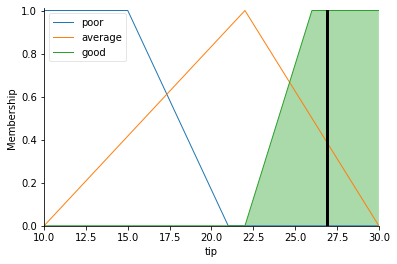

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


food = ctrl.Antecedent(np.arange(0,11,1),'food')
service= ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']=fuzz.trapmf(food.universe,[0,3,3,3])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trapmf(food.universe,[7,10,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[7,10,10])

tip['poor']=fuzz.trapmf(tip.universe,[0,10,15,21])
tip['average']=fuzz.trimf(tip.universe,[10,22,30])
tip['good']=fuzz.trapmf(tip.universe,[22,26,30,30])

food.view()
service.view()
tip.view()
service['average'].view()

rule_1=ctrl.Rule(food['poor']&service['poor'],tip['poor'])
rule_2=ctrl.Rule(food['poor']&service['average'],tip['poor'])
rule_3=ctrl.Rule(food['poor']&service['good'],tip['average'])
rule_4=ctrl.Rule(food['average']&service['poor'],tip['poor'])
rule_5=ctrl.Rule(food['average']&service['average'],tip['average'])
rule_6=ctrl.Rule(food['good']&service['average'],tip['average'])
rule_7=ctrl.Rule(food['average']&service['good'],tip['good'])
rule_8=ctrl.Rule(food['good']&service['good'],tip['good'])
rule_9=ctrl.Rule(food['poor']&service['good'],tip['average'])

tipping_ctrl=ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)




ValueError: ignored

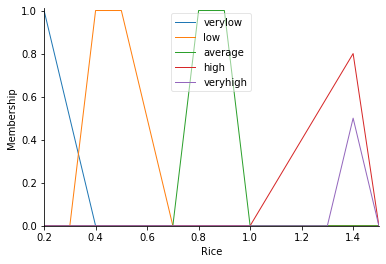

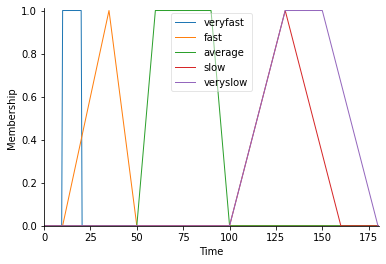

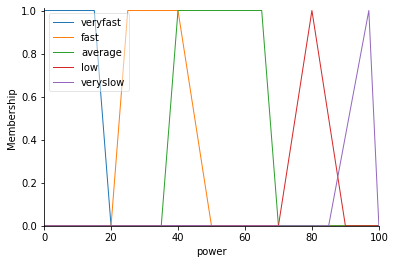

In [ ]:
from matplotlib.cbook import time
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


Time = ctrl.Antecedent(np.arange(0,181,0.5),'Time')
Rice= ctrl.Antecedent(np.arange(0.2,1.6,0.1),'Rice')
power=ctrl.Consequent(np.arange(0,101,1),'power')

Time['veryfast']=fuzz.trapmf(Time.universe,[10,10,20,20])
Time['fast']=fuzz.trimf(Time.universe,[10,35,50])
Time['average']=fuzz.trapmf(Time.universe,[50,60,90,100])
Time['slow']=fuzz.trimf(Time.universe,[100,130,160])
Time['veryslow']=fuzz.trapmf(Time.universe,[100,130,150,180])

Rice['verylow']=fuzz.trimf(Rice.universe,[0.2,0.2,0.4])
Rice['low']=fuzz.trapmf(Rice.universe,[0.3,0.4,0.5,0.7])
Rice['average']=fuzz.trapmf(Rice.universe,[0.7,0.75,0.9,1])
Rice['high']=fuzz.trimf(Rice.universe,[1,1.5,1.5])
Rice['veryhigh']=fuzz.trimf(Rice.universe,[1.3,1.5,1.5])

power['veryfast']=fuzz.trapmf(power.universe,[0,0,15,20])
power['fast']=fuzz.trapmf(power.universe,[20,25,40,50])
power['average']=fuzz.trapmf(power.universe,[35,40,65,70])
power['low']=fuzz.trimf(power.universe,[70,80,90])
power['veryslow']=fuzz.trimf(power.universe,[85,97,100])

##rule

rule_1=ctrl.Rule(Rice['verylow']&Time['veryfast'],power['veryfast'])
rule_2=ctrl.Rule(Rice['verylow']&Time['fast'],power['veryfast'])
rule_3=ctrl.Rule(Rice['verylow']&Time['average'],power['average'])
rule_4=ctrl.Rule(Rice['verylow']&Time['slow'],power['average'])
rule_5=ctrl.Rule(Rice['verylow']&Time['veryslow'],power['low'])

rule_6=ctrl.Rule(Rice['low']&Time['veryfast'],power['veryfast'])
rule_7=ctrl.Rule(Rice['low']&Time['fast'],power['fast'])
rule_8=ctrl.Rule(Rice['low']&Time['average'],power['average'])
rule_9=ctrl.Rule(Rice['low']&Time['slow'],power['average'])
rule_10=ctrl.Rule(Rice['low']&Time['veryslow'],power['low'])

rule_11=ctrl.Rule(Rice['average']&Time['veryfast'],power['fast'])
rule_12=ctrl.Rule(Rice['average']&Time['fast'],power['average'])
rule_13=ctrl.Rule(Rice['average']&Time['average'],power['average'])
rule_14=ctrl.Rule(Rice['average']&Time['slow'],power['low'])
rule_15=ctrl.Rule(Rice['average']&Time['veryslow'],power['veryslow'])

rule_16=ctrl.Rule(Rice['high']&Time['veryfast'],power['average'])
rule_17=ctrl.Rule(Rice['high']&Time['fast'],power['low'])
rule_18=ctrl.Rule(Rice['high']&Time['average'],power['low'])
rule_19=ctrl.Rule(Rice['high']&Time['slow'],power['veryslow'])
rule_20=ctrl.Rule(Rice['high']&Time['veryslow'],power['veryslow'])

rule_21=ctrl.Rule(Rice['veryhigh']&Time['veryfast'],power['veryslow'])
rule_22=ctrl.Rule(Rice['veryhigh']&Time['fast'],power['veryslow'])
rule_23=ctrl.Rule(Rice['veryhigh']&Time['average'],power['veryslow'])
rule_24=ctrl.Rule(Rice['veryhigh']&Time['slow'],power['veryslow'])
rule_25=ctrl.Rule(Rice['veryhigh']&Time['veryslow'],power['veryslow'])
##
Rice.view()
Time.view()
power.view()
##
powerping_ctrl=ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,rule_21,rule_22,rule_23,rule_24,rule_25])
powerping=ctrl.ControlSystemSimulation(powerping_ctrl)
powerping.input['Rice']=1
powerping.input['Time']=180
powerping.compute()
print(powerping.output['power'])
power.view(sim=powerping)



